In [ ]:
import os
if os.path.isdir('/content/drive') == False:
  from google.colab import drive
  drive.mount('/content/drive')
else :
  print('Already Loaded')
#importing : 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from tensorflow import keras
from scipy import stats
#Scale the data
from sklearn.preprocessing import MinMaxScaler
#training data
from sklearn.linear_model import Ridge

Mounted at /content/drive


In [ ]:
stock_path  = '/content/drive/MyDrive/Colab Notebooks/Python for Financial Analysis/Part 3. AI and ML in Finance/stock.csv'
volume_path = '/content/drive/MyDrive/Colab Notebooks/Python for Financial Analysis/Part 3. AI and ML in Finance/stock_volume.csv'

In [ ]:
stock_prices = pd.read_csv(stock_path)
stock_vol    = pd.read_csv(volume_path)

In [ ]:
stock_prices.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:
stock_vol.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000


In [ ]:
#sort data : 
stock_prices = stock_prices.sort_values(by = ['Date'])
stock_vol    = stock_vol.sort_values(by = ['Date'])

In [ ]:
stock_prices.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
stock_vol.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
stock_vol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
stock_prices.mean()

AAPL      140.819823
BA        189.942700
T          35.162899
MGM        23.105743
AMZN      915.665665
IBM       161.853001
TSLA      259.600815
GOOG      783.712512
sp500    2218.749554
dtype: float64

In [ ]:
stock_prices.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [ ]:
stock_vol.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


In [ ]:
#Task number 3


def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

def interactive_plot(df,title):
  fig = px.line(title = title + 'vs Date')
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'],y = df[i],name= i )
  fig.show()

In [ ]:
interactive_plot(stock_prices,'Stock Prices')

In [ ]:
interactive_plot(normalize(stock_prices),'Stock Prices')

In [ ]:
interactive_plot(normalize(stock_vol),'Stock Prices')

In [ ]:
!pip install yfinance
import yfinance as yf
import datetime
import time
import requests
import io

     |████████████████████████████████| 6.3MB 36.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=78a7892decb54cc9215696eebf267d7f1967f1f1ab7243894aa719ee046d4d65
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
start = datetime.datetime(2020,2,1)
end = datetime.datetime(2021,5,17)

In [ ]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
companies.to_csv('companies.csv')

In [ ]:
Symbols = companies['Symbol'].tolist()

In [ ]:
Symbols[:11]

['AAIT',
 'AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAPL',
 'AAVL',
 'AAWW',
 'AAXJ',
 'ABAC',
 'ABAX']

In [ ]:
# create empty dataframe
# stock_final = pd.DataFrame()
# iterate over each symbol
# count = 1852
  
k = ['TCL']
try:
    # download the stock price 
    stock = []
    stock = yf.download('MGM',start=start, end=end, progress=False)
    
    # append the individual stock prices 
    if len(stock) == 0:
        None
    else:
        stock['Name']=i
        stock_final = stock_final.append(stock,sort=False)
except Exception:
    None
    print('NOT FOUND')
    # count+=count

NOT FOUND


In [ ]:
stock_final.to_csv('/content/drive/MyDrive/DATASCIENCE/back_upStocks.csv')
# os.m

In [ ]:
name = list(stock_final['Name'].unique())

NameError: ignored

In [ ]:
name.index('TSLA')

1619

In [ ]:
stock_prices.columns

Index(['Date', 'AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG',
       'sp500'],
      dtype='object')

In [ ]:
import shutil

original = '/content/Stocks.csv'
target = '/content/drive/MyDrive/DATASCIENCE/Stocks_scraped.csv'
shutil.copyfile(original, target)

'/content/drive/MyDrive/DATASCIENCE/Stocks_scraped.csv'

In [ ]:
list_in = list(stock_final['Name']).index('AAPL') 
list_in

In [ ]:
print(stock_final.values[1562])
print(stock_final.columns)

[76.07499694824219 78.37249755859375 75.55500030517578 77.16500091552734
 76.26062774658203 173788400.0 'AAPL']
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name'], dtype='object')


In [ ]:
stock_final.columns

TypeError: ignored

In [ ]:
stock_final[4:10].Close

Date
2020-02-10    0.086
2020-02-11    0.086
2020-02-12    0.085
2020-02-13    0.085
2020-02-18    0.085
2020-02-19    0.085
Name: Close, dtype: float64

In [ ]:
for i in stock_final['Name'].unique():
  print(i)

In [ ]:
len(stock_final)

594797

KeyError: ignored

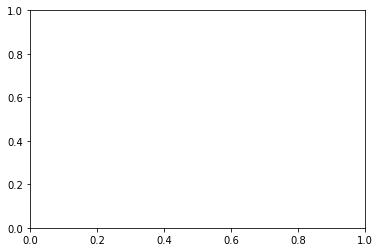

In [ ]:
stock_final.plot.scatter(x='Date',y='AAPL')


In [ ]:
588 ,FBMS

In [ ]:
Symbols.index('BA')

ValueError: ignored

In [ ]:
count = 0
STOCK = 'TSLA'
df = pd.DataFrame([])
list_in = list(stock_final['Name']).index(STOCK) 

for i in stock_final.Name:
  if i==STOCK:
    count+=1

df = stock_final['Adj Close'][list_in : list_in+count]
# df  = stock_final['Name'][list_in]

In [ ]:
df.head()

Date
2020-02-03    156.000000
2020-02-04    177.412003
2020-02-05    146.940002
2020-02-06    149.792007
2020-02-07    149.613998
Name: Adj Close, dtype: float64

**TASK 4**


In [ ]:
def individual_stock(stock_df,stock_vol,name):
  return pd.DataFrame({'Date':stock_df['Date'],
                       'Close':stock_df[name],
                       'Volume':stock_vol[name]
                       })
def trading_window(data):
  n = 1
  data['Target'] = data[['Close']].shift(-n)
  return data

def show_plot(data,title):
  plt.figure(figsize = (13,5))
  plt.plot(data,linewidth = 3)
  plt.title(title)
  plt.grid()

In [ ]:
price_volume_df = individual_stock(stock_prices,stock_vol,'AAPL')
# trading window for next day# addded target column
price_volume_target_df = trading_window(price_volume_df)


# #remove last row because no future data

price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [ ]:
stock_vol_target

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))
scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [ ]:
scaled_df.shape

(2158, 3)

In [ ]:
#FEATURE AND TARGET
x = scaled_df[:,:2]
y = scaled_df[:,2:]

In [ ]:
split = int(0.90*len(x))
x_train = x[:split]
x_test  = x[split:]
y_train = y[:split]
y_test  = y[split:]

split

1942

In [ ]:
print(
'Training data for X : {}'.format(x_train.shape),
'\nTraining data for Y : {}'.format(y_train.shape))

Training data for X : (1942, 2) 
Training data for Y : (1942, 1)


In [ ]:
def show_plot(data,title):
  plt.figure(figsize = (13,5))
  plt.plot(data,linewidth = 3)
  plt.title(title)
  plt.grid()

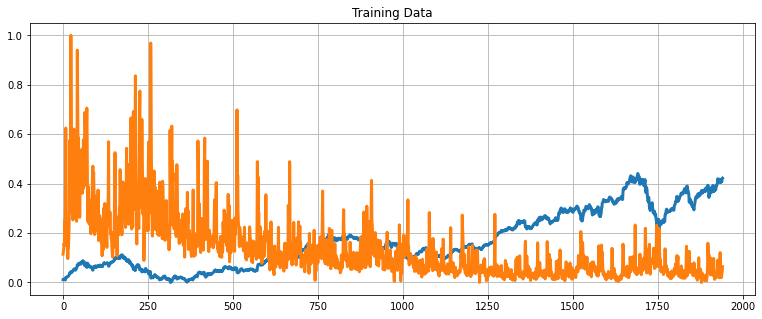

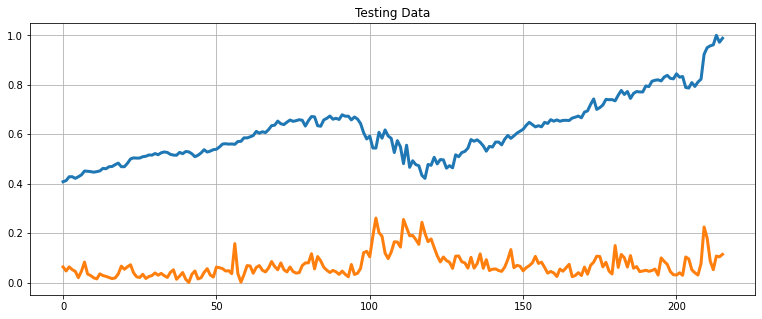

In [ ]:
show_plot(x_train,'Training Data')
show_plot(x_test,'Testing Data')

In [ ]:
price_volume_target_df[:3]

,Date,Close,Volume,Target
0,2012-01-12,1295.500000,4019890000,1289.089966
1,2012-01-13,1289.089966,3692370000,1293.670044
2,2012-01-17,1293.670044,4010490000,1308.040039


Training data for X : (1942, 2) 
Training data for Y : (1942, 1)


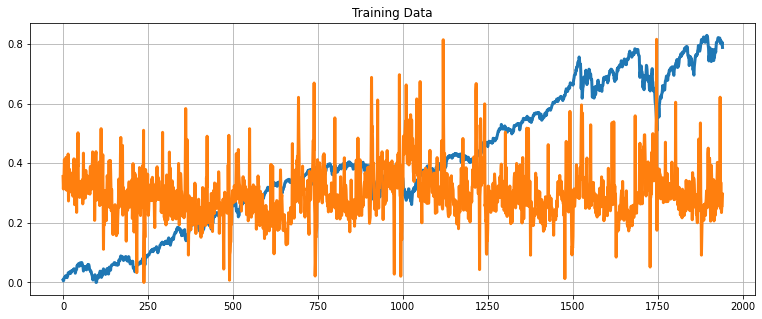

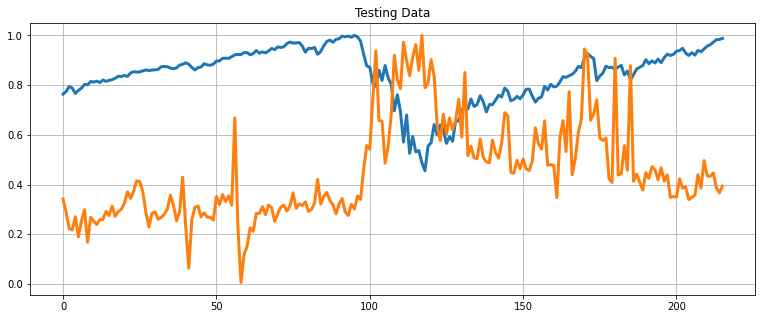

In [ ]:
STOCK_NAME = 'sp500'
price_volume_df = individual_stock(stock_prices,stock_vol,STOCK_NAME)
# trading window for next day# addded target column
price_volume_target_df = trading_window(price_volume_df)


# #remove last row because no future data

price_volume_target_df = price_volume_target_df[:-1]



#         Date	      Close	    Volume	     Target
# 0	2012-01-12	1295.500000	4019890000	1289.089966
# 1	2012-01-13	1289.089966	3692370000	1293.670044
# 2	2012-01-17	1293.670044	4010490000	1308.040039

#Scale the data
sc = MinMaxScaler(feature_range=(0,1))
scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

#FEATURE AND TARGET
x = scaled_df[:,:2]
y = scaled_df[:,2:]

split = int(0.90*len(x))

x_train = x[:split]
x_test  = x[split:]
y_train = y[:split]
y_test  = y[split:]

print(
'Training data for X : {}'.format(x_train.shape),
'\nTraining data for Y : {}'.format(y_train.shape))


show_plot(x_train,'Training Data')
show_plot(x_test,'Testing Data')

**TASK #7**

In [ ]:
from sklearn.linear_model import Ridge


In [ ]:
regression_model = Ridge()
regression_model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
#Test Model
lr_accuracy = regression_model.score(x_test,y_test)
print('Ridge Regression Score : ',lr_accuracy)

Ridge Regression Score :  0.9291941569060369


In [ ]:
#Prediction Method 
predicted_prices = regression_model.predict(x)
predicted_prices

array([[0.012776  ],
       [0.00986314],
       [0.01192002],
       ...,
       [0.97639014],
       [0.97743222],
       [0.9816826 ]])

In [ ]:
predicted = []
for i in predicted_prices:
  predicted.append(i[0])

In [ ]:
len(predicted)

2158

In [ ]:
# append the close values
close = []
for i in scaled_df:
  close.append(i[0])

In [ ]:
len(close)

2158

In [ ]:
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [ ]:
df_predicted['Close'] = close;


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# df_predicted['Close'].isnull().sum()

0

In [ ]:
df_predicted['Predicted'] = predicted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_predicted

,Date,Close,Predicted
0,2012-01-12,0.008282,0.012776
1,2012-01-13,0.005242,0.009863
2,2012-01-17,0.007414,0.011920
3,2012-01-18,0.014231,0.018638
4,2012-01-19,0.017295,0.021562
...,...,...,...
2153,2020-08-04,0.962222,0.956274
2154,2020-08-05,0.972307,0.966218
2155,2020-08-06,0.982453,0.976390
2156,2020-08-07,0.983459,0.977432


In [ ]:
interactive_plot(df_predicted,'Original Vs Predictions')

Training data for X : (1942, 2) 
Training data for Y : (1942, 1)
Ridge Regression Score :  0.9307824513463776


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



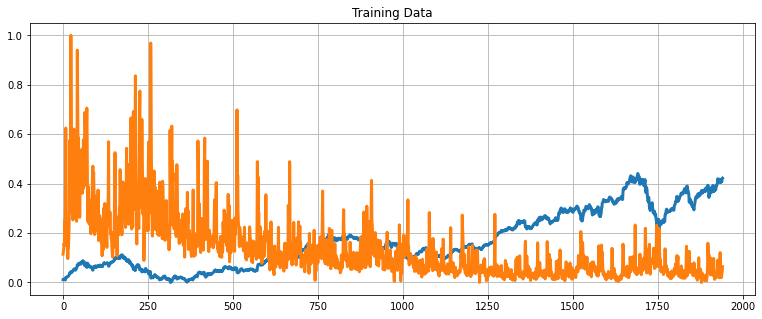

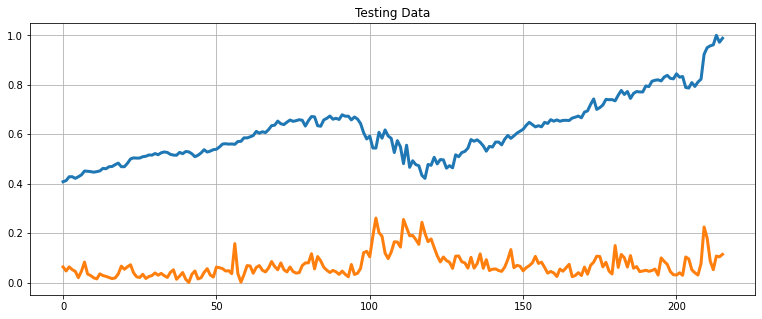

In [ ]:
# MODEL REQUIREMENTS
STOCK_NAME   = 'AAPL'
ALPHA        = 1
TEST_PERCENT = 0.9 # < 1
##########################


price_volume_df = individual_stock(stock_prices,stock_vol,STOCK_NAME)
# trading window for next day# addded target column
price_volume_target_df = trading_window(price_volume_df)

# #remove last row because no future data

price_volume_target_df = price_volume_target_df[:-1]



#         Date	      Close	    Volume	     Target
# 0	2012-01-12	1295.500000	4019890000	1289.089966
# 1	2012-01-13	1289.089966	3692370000	1293.670044
# 2	2012-01-17	1293.670044	4010490000	1308.040039

#Scale the data
sc = MinMaxScaler(feature_range=(0,1))
scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

#FEATURE AND TARGET
x = scaled_df[:,:2]
y = scaled_df[:,2:]

split = int(TEST_PERCENT*len(x))

x_train = x[:split]
x_test  = x[split:]
y_train = y[:split]
y_test  = y[split:]

print(
'Training data for X : {}'.format(x_train.shape),
'\nTraining data for Y : {}'.format(y_train.shape))


show_plot(x_train,'Training Data')
show_plot(x_test,'Testing Data')

##TRAINING DATA

regression_model = Ridge(alpha = ALPHA)
regression_model.fit(x_train,y_train)
#Test Model
lr_accuracy = regression_model.score(x_test,y_test)
print('Ridge Regression Score : ',lr_accuracy)
#Prediction Method 
predicted_prices = regression_model.predict(x)

predicted = []
for i in predicted_prices:
  predicted.append(i[0])

# append the close values
close = []
for i in scaled_df:
  close.append(i[0])

df_predicted = price_volume_target_df[['Date']]
df_predicted['Close'] = close;

df_predicted['Predicted'] = predicted

interactive_plot(df_predicted,'Original Vs Predictions')

**Artificial Neural Networks**

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1U2auh7KSalF4qc8iWFScawEB3TniFeXw)

![alt text](https://drive.google.com/uc?id=1xsy74Dj9JyuvwcPzmQcwN9hzHGevAvKB)

![alt text](https://drive.google.com/uc?id=1b2wIRl63jXgyoh_w1ysxk3XvTJ5j8864)

# TASK #9: UNDERSTAND HOW DO ARTFICIAL NEURAL NETWORKS TRAIN 

![alt text](https://drive.google.com/uc?id=1pg1rxBoHDtRNVNN0TyMvnCMVKw9ni5pN)

![alt text](https://drive.google.com/uc?id=1wc4NOBLC55Hb2s8s_hLI2LWykV4WmLwU)

![alt text](https://drive.google.com/uc?id=1zI3MbDUAws-gpPisqDrVL8BoupWRO6KJ)

![alt text](https://drive.google.com/uc?id=1twCXUdFtdFMGsicoQOWI0a9RiHMZ9MK_)

# TASK #10: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1a6w38XX_W2Zcsvde5FDepUax1aRyvnBT)

![alt text](https://drive.google.com/uc?id=1tc1SRSaFp-zuvujAQY66E_JEoY6doI0m)

![alt text](https://drive.google.com/uc?id=10xmgZjv2IjaY4xFm81rwgKqOC0119tug)

![alt text](https://drive.google.com/uc?id=1CwBOagYD82QaayeGDndRjb_Irm5HIwBs)

![alt text](https://drive.google.com/uc?id=148mslyqerZ_gLzQIkPFiDsewCO5nMNK7)

![alt text](https://drive.google.com/uc?id=1_Ky5ek9gq_Ov6VLTkXFmmzEhvjo91tpB)

# TASK #11: UNDERSTAND THE THEORY AND INTUITION BEHIND LONG SHORT TERM MEMORY NETWORKS

![alt text](https://drive.google.com/uc?id=1cd3jZpTuSzsPjMps6SRFqvXNfs4jA_vu)

![alt text](https://drive.google.com/uc?id=1URS5Ny54g-c3ookAL1FLn28TYFlbDIdG)

![alt text](https://drive.google.com/uc?id=1Cm3Unnn_b71rfklW_ejm50xYOYkXh8cl)

![alt text](https://drive.google.com/uc?id=1pU8lbF965n38ZspjIFsEAU3CEjpclpfd)

![alt text](https://drive.google.com/uc?id=1zSqTnPZDfiz6qRgMHaFB9wpB55Fnzwf4)

**LSTM networks**

In [ ]:
# MODEL REQUIREMENTS
STOCK_NAME   = 'sp500'
ALPHA        = 1
TEST_PERCENT = 0.9 # < 1
##########################


price_volume_df = individual_stock(stock_prices,stock_vol,STOCK_NAME)
 
#skip date
training_data = price_volume_df.iloc[:,1:3].values

sc = MinMaxScaler(feature_range=(0,1))
scaled_df = sc.fit_transform(training_data)


X = []
Y = []
for i in range(1,len(price_volume_df)):
  X.append(scaled_df[i-1:i,0])
  Y.append(scaled_df[i,0])


In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)

In [ ]:
TEST_PERCENT = 0.8
split = int(TEST_PERCENT*len(X))

# Train
X_train = X[:split]
Y_train = Y[:split]

# Test
X_test  = X[split:]
Y_test  = Y[split:]


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_train.shape, X_test.shape

((1726, 1, 1), (432, 1, 1))

In [ ]:
# LSTM MODEL

inputs = keras.layers.Input(shape = (X_train.shape[1],X_train.shape[2]))
x = keras.layers.LSTM(150,return_sequences=True) (inputs) #units = 150
x = keras.layers.LSTM(150,return_sequences=True) (x)
x = keras.layers.LSTM(150,return_sequences=True) (x)
outputs = keras.layers.Dense(1,activation = 'linear')(x)



model = keras.Model(inputs = inputs,outputs = outputs)
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 150)            91200     
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 150)            180600    
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 150)            180600    
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              151       
Total params: 452,551
Trainable params: 452,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# TRAIN MODEL
history = model.fit(X_train,Y_train,epochs = 20,batch_size = 50, validation_split = 0.2)

In [ ]:
#make predicitions 
predictions = model.predict(X)

In [ ]:
#append predicted values to list
test_predicted = []
for i in predictions:
  test_predicted.append(i[0][0])
close = []
for i in scaled_df:
  close.append(i[0])


In [ ]:
test_predicted

In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted['Predicted'] = test_predicted
df_predicted['Close']     = close[1:]
df_predicted

,Date,Predicted,Close
1,2012-01-13,0.011816,0.005242
2,2012-01-17,0.008893,0.007414
3,2012-01-18,0.010981,0.014231
4,2012-01-19,0.017540,0.017295
5,2012-01-20,0.020491,0.017713
...,...,...,...
2154,2020-08-05,0.980663,0.972307
2155,2020-08-06,0.991089,0.982453
2156,2020-08-07,1.001575,0.983459
2157,2020-08-10,1.002614,0.987819


In [ ]:
interactive_plot(df_predicted,'Original vs Predicted')

**MODELING USING LSTM**

In [ ]:
# MODEL REQUIREMENTS
STOCK_NAME   = 'AAPL'
ALPHA        = 1
TEST_PERCENT = 0.8 # < 1
EPOCH        = 50
BSIZE        = 20
UNITS        = 500
##########################


price_volume_df = individual_stock(stock_prices,stock_vol,STOCK_NAME)
 
#skip date
training_data = price_volume_df.iloc[:,1:3].values

sc = MinMaxScaler(feature_range=(0,1))
scaled_df = sc.fit_transform(training_data)


X = []
Y = []
for i in range(1,len(price_volume_df)):
  X.append(scaled_df[i-1:i,0])
  Y.append(scaled_df[i,0])

X = np.asarray(X)
Y = np.asarray(Y)
split = int(TEST_PERCENT*len(X))

# Train
X_train = X[:split]
Y_train = Y[:split]

# Test
X_test  = X[split:]
Y_test  = Y[split:]

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_train.shape, X_test.shape
# LSTM MODEL

inputs = keras.layers.Input(shape = (X_train.shape[1],X_train.shape[2]))
x = keras.layers.LSTM(UNITS,return_sequences=True) (inputs) #units = 150
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(UNITS,return_sequences=True) (x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(UNITS,return_sequences=True) (x)
outputs = keras.layers.Dense(1,activation = 'linear')(x)



model = keras.Model(inputs = inputs,outputs = outputs)
model.compile(optimizer = 'adam', loss = 'mse')
print(model.summary())

# TRAIN MODEL
history = model.fit(X_train,Y_train,epochs = EPOCH,batch_size = BSIZE, validation_split = 0.2)

#make predicitions 
predictions = model.predict(X)


#append predicted values to list
test_predicted = []
for i in predictions:
  test_predicted.append(i[0][0])

close = []
for i in scaled_df:
  close.append(i[0])


df_predicted = price_volume_df[1:][['Date']]
df_predicted['Predicted'] = test_predicted
df_predicted['Close']     = close[1:]

interactive_plot(df_predicted,'Original vs Predicted')

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 1, 500)            1004000   
_________________________________________________________________
dropout (Dropout)            (None, 1, 500)            0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 1, 500)            2002000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 500)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 1, 500)            2002000   
_________________________________________________________________
dense_7 (Dense)              (None, 1, 1)              501 